In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

np.random.seed(4)
tf.random.set_seed(4)


# part 3


In [8]:
df = pd.read_csv("/content/drive/MyDrive/ML_Miniproject3/creditcard.csv")
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df = df.drop(columns='Time')

In [10]:
scaler = StandardScaler()
scaler.fit(df[['Amount']])
df['Amount'] = scaler.transform(df[['Amount']])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [11]:
X = df.drop(['Class'], axis=1)
y = df['Class']


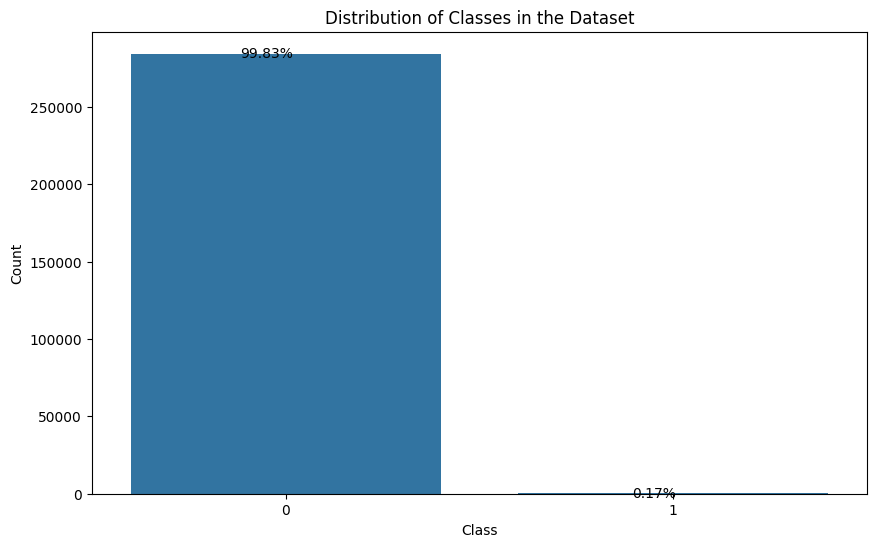

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')


total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [12]:
unique_classes = np.unique(y)
num_classes = len(unique_classes)
print(f"Number of classes: {num_classes}")
y_categorical = to_categorical(y, num_classes=num_classes)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, train_size=0.6, random_state=4, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=y_temp)


Number of classes: 2


In [13]:
print("Training set class distribution:\n", train_class_distribution)
print("\nValidation set class distribution:\n", valid_class_distribution)
print("\nTesting set class distribution:\n", test_class_distribution)

NameError: name 'train_class_distribution' is not defined

In [14]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
85890,-3.421611,-3.700173,2.311964,2.239651,0.661817,-0.692678,0.160456,0.103225,-0.241153,-0.370558,...,2.116885,0.743580,0.534492,1.620620,0.320671,0.341376,-0.202306,-0.314549,-0.027082,1.925680
214708,1.662123,-1.508637,1.269097,1.468304,-2.441475,0.240784,-1.630958,0.224378,1.157494,0.546776,...,-0.421563,-0.105210,0.532975,0.201376,0.944320,-0.371644,-0.545055,0.146052,0.018455,0.146531
110216,-0.841195,0.087481,2.293701,3.024151,-0.707858,0.949964,1.252692,-0.052308,-0.639010,0.173155,...,0.668147,0.166159,0.512199,0.521409,0.616036,-0.281334,0.090801,-0.063225,-0.046829,0.719657
176439,1.529215,-1.005991,-1.873063,0.138654,0.986017,1.934256,-0.211201,0.525039,0.388268,0.091011,...,0.012240,0.516281,1.297954,-0.081161,-1.092583,-0.166372,0.671573,-0.037705,-0.059591,0.390415
8245,-0.667289,0.600818,2.054872,-1.044446,-0.069753,-0.350290,0.231211,0.106925,1.061027,-1.084210,...,-0.149199,0.029474,0.167989,-0.259529,-0.022754,-0.080936,0.879992,-0.049783,0.063888,-0.301454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72787,-1.026418,1.449185,0.892519,1.015882,-0.787405,-0.965951,0.744703,0.132341,-0.618785,-0.072812,...,-0.079370,0.193751,0.568412,-0.075359,0.941348,-0.272785,-0.371984,0.092000,0.111842,-0.023387
174552,2.290976,-1.487494,-0.611498,-1.459028,-1.667697,-0.835689,-1.368717,-0.105678,-0.804076,1.594516,...,-0.556884,-0.165261,0.017481,0.284360,-0.144545,-0.335847,-0.162762,0.021961,-0.050483,-0.329241
221099,1.999128,-0.096849,-1.125143,1.485090,-0.084511,-0.748490,0.062372,-0.152023,0.932529,0.225229,...,-0.406165,0.151927,0.693000,-0.031212,-0.099817,0.379775,-0.360693,0.007643,-0.059480,-0.333239
155301,-0.953537,0.419475,2.384394,-0.129731,0.297654,-0.142279,0.293289,-0.106179,1.436065,-0.830540,...,-0.045903,-0.261785,-0.305232,0.009005,-0.108974,0.251027,-0.745436,-0.179842,-0.183282,-0.344753


In [15]:
smote = SMOTE(sampling_strategy='minority', random_state=4)
X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_res = to_categorical(y_train_res, num_classes=2)

In [16]:
# Adding Gaussian noise to the data
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train_res)
X_valid_noisy = add_noise(X_valid)

# Define the autoencoder model
input_dim = X_train_res.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(22, activation="relu")(encoder)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(22, activation="relu")(encoder)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

autoencoder.fit(X_train_noisy, X_train_res,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_valid_noisy, X_valid),
                callbacks=[checkpoint],
                verbose=1)



Epoch 1/20
1313/1333 [============================>.] - ETA: 0s - loss: 12.9695
Epoch 1: val_loss improved from inf to 1.11611, saving model to best_autoencoder.h5
1333/1333 [==============================] - 5s 3ms/step - loss: 12.9622 - val_loss: 1.1161
Epoch 2/20
  44/1333 [..............................] - ETA: 3s - loss: 12.6930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1320/1333 [============================>.] - ETA: 0s - loss: 12.8540
Epoch 2: val_loss improved from 1.11611 to 1.09801, saving model to best_autoencoder.h5
1333/1333 [==============================] - 4s 3ms/step - loss: 12.8526 - val_loss: 1.0980
Epoch 3/20
1329/1333 [============================>.] - ETA: 0s - loss: 12.8438
Epoch 3: val_loss improved from 1.09801 to 1.09624, saving model to best_autoencoder.h5
1333/1333 [==============================] - 5s 4ms/step - loss: 12.8441 - val_loss: 1.0962
Epoch 4/20
1323/1333 [============================>.] - ETA: 0s - loss: 12.8416
Epoch 4: val_loss improved from 1.09624 to 1.08940, saving model to best_autoencoder.h5
1333/1333 [==============================] - 4s 3ms/step - loss: 12.8413 - val_loss: 1.0894
Epoch 5/20
1316/1333 [============================>.] - ETA: 0s - loss: 12.8424
Epoch 5: val_loss improved from 1.08940 to 1.08173, saving model to best_autoencoder.h5
1333/1333 [==============================] - 4s 3ms/step - loss

In [17]:
autoencoder.load_weights('best_autoencoder.h5')
# Denoise the data
X_train_denoised = autoencoder.predict(X_train_noisy)
X_valid_denoised = autoencoder.predict(X_valid_noisy)

# Define the classifier model
classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier_checkpoint = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the classifier with the ModelCheckpoint callback
classifier.fit(X_train_denoised, y_train_res,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_valid_denoised, y_valid),
               callbacks=[classifier_checkpoint],
               verbose=1)



1781/1781 [==============================] - 2s 1ms/step
Epoch 1/20
1331/1333 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9146
Epoch 1: val_loss improved from inf to 0.15993, saving model to best_classifier.h5
1333/1333 [==============================] - 5s 3ms/step - loss: 0.2214 - accuracy: 0.9146 - val_loss: 0.1599 - val_accuracy: 0.9429
Epoch 2/20
  29/1333 [..............................] - ETA: 5s - loss: 0.1784 - accuracy: 0.9320

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1324/1333 [============================>.] - ETA: 0s - loss: 0.1809 - accuracy: 0.9307
Epoch 2: val_loss improved from 0.15993 to 0.15187, saving model to best_classifier.h5
1333/1333 [==============================] - 5s 4ms/step - loss: 0.1809 - accuracy: 0.9306 - val_loss: 0.1519 - val_accuracy: 0.9470
Epoch 3/20
1319/1333 [============================>.] - ETA: 0s - loss: 0.1750 - accuracy: 0.9332
Epoch 3: val_loss improved from 0.15187 to 0.14288, saving model to best_classifier.h5
1333/1333 [==============================] - 3s 3ms/step - loss: 0.1751 - accuracy: 0.9332 - val_loss: 0.1429 - val_accuracy: 0.9488
Epoch 4/20
1332/1333 [============================>.] - ETA: 0s - loss: 0.1720 - accuracy: 0.9346
Epoch 4: val_loss did not improve from 0.14288
1333/1333 [==============================] - 3s 2ms/step - loss: 0.1720 - accuracy: 0.9346 - val_loss: 0.1875 - val_accuracy: 0.9335
Epoch 5/20
1328/1333 [============================>.] - ETA: 0s - loss: 0.1699 - accuracy: 0.9356

# Part 4

In [18]:
classifier.load_weights('best_classifier.h5')
X_test_noisy = add_noise(X_test)
X_test_denoised = autoencoder.predict(X_test)

evaluation = classifier.evaluate(X_test_denoised, y_test, verbose=0)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

y_pred = np.argmax(classifier.predict(X_test_denoised), axis=1)
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
print(f'Recall: {recall}')


1781/1781 [==============================] - 3s 2ms/step
Loss: 0.5563066005706787, Accuracy: 0.8424915075302124
1781/1781 [==============================] - 2s 1ms/step
Recall: 0.8888888888888888


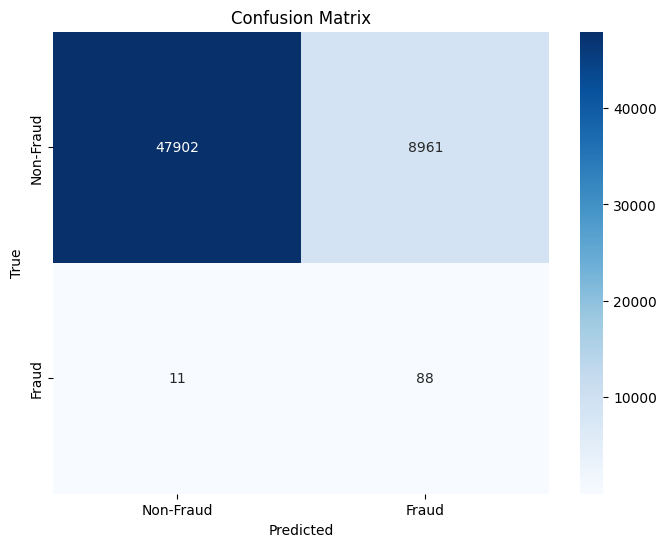

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.84      0.91     56863
       Fraud       0.01      0.89      0.02        99

    accuracy                           0.84     56962
   macro avg       0.50      0.87      0.47     56962
weighted avg       1.00      0.84      0.91     56962



In [19]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

1781/1781 [==============================] - 3s 2ms/step
Loss: 0.12102995812892914, Accuracy: 0.9594641923904419
1781/1781 [==============================] - 3s 2ms/step
Recall: 0.8383838383838383
Precision: 0.04540481400437637
F1-score: 0.08614426569797613


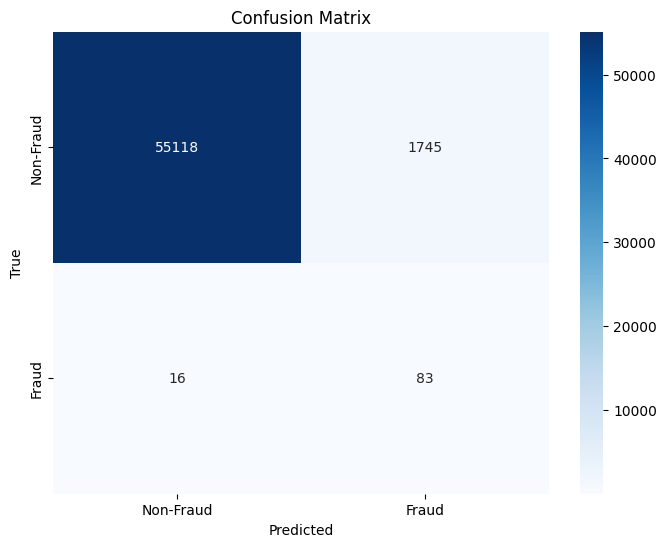

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.98     56863
       Fraud       0.05      0.84      0.09        99

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [20]:
# Evaluate the classifier on the test set
X_test_noisy = add_noise(X_test)
X_test_denoised = autoencoder.predict(X_test_noisy)

evaluation = classifier.evaluate(X_test_denoised, y_test, verbose=0)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

# Predict probabilities
y_pred_prob = classifier.predict(X_test_denoised)

# Adjust threshold
threshold = 0.6  # You can adjust this value
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

# Calculate recall
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
print(f'Recall: {recall}')

# Calculate precision
precision = precision_score(np.argmax(y_test, axis=1), y_pred)
print(f'Precision: {precision}')

# Calculate F1-score
f1 = f1_score(np.argmax(y_test, axis=1), y_pred)
print(f'F1-score: {f1}')

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

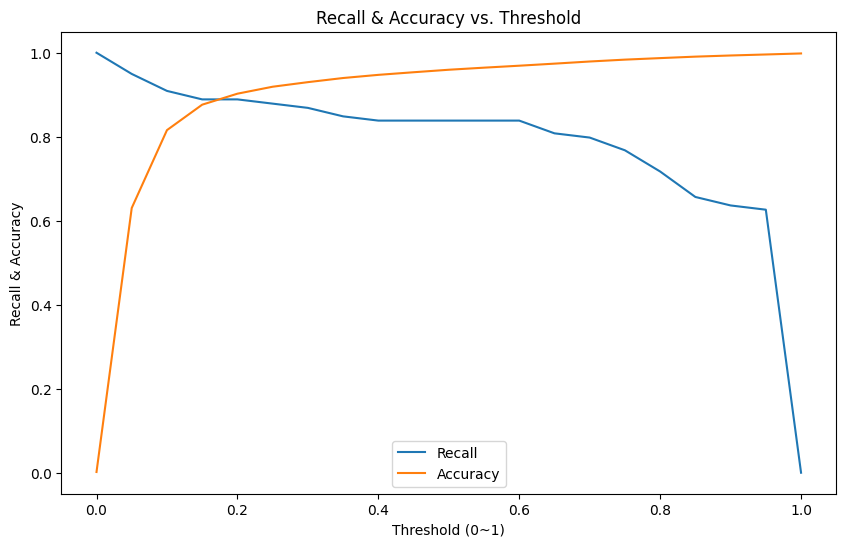

In [21]:
thresholds = np.arange(0.0, 1.05, 0.05)

recalls = []
accuracies = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

|   Threshold | Recall Rate   | Accuracy   |
|------------:|:--------------|:-----------|
|         0.2 | 88.89%        | 90.25%     |
|         0.3 | 86.87%        | 92.99%     |
|         0.4 | 83.84%        | 94.73%     |
|         0.5 | 83.84%        | 95.95%     |
|         0.6 | 83.84%        | 96.91%     |
|         0.7 | 79.80%        | 97.91%     |
|         0.8 | 71.72%        | 98.72%     |


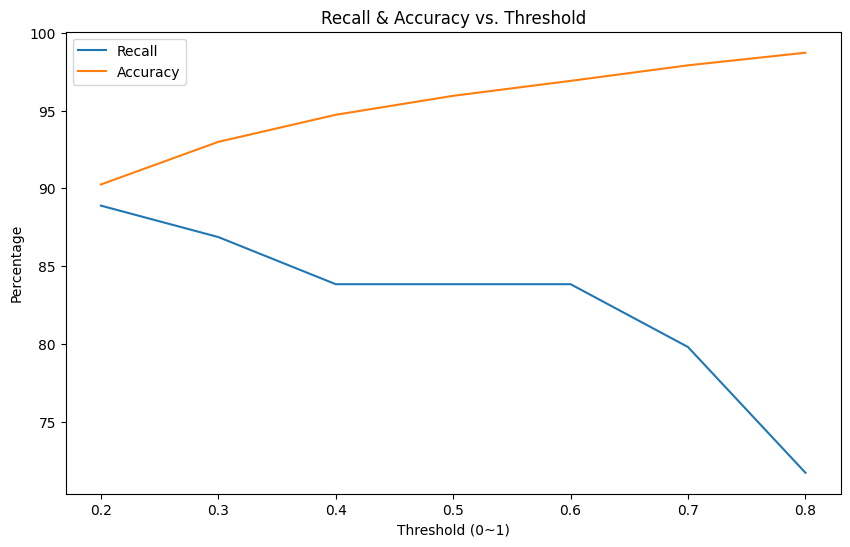

In [22]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

results = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'Threshold': threshold, 'Recall Rate': f'{recall:.2%}', 'Accuracy': f'{accuracy:.2%}'})

results_df = pd.DataFrame(results)

print(results_df.to_markdown(index=False))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, [float(r['Recall Rate'].strip('%')) for r in results], label='Recall')
plt.plot(thresholds, [float(r['Accuracy'].strip('%')) for r in results], label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Percentage')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

Resampled dataset shape with strategy 0.1: (187647, 29) (187647, 2)
Epoch 1/20
733/733 [==============================] - 4s 4ms/step - loss: 3.1939 - val_loss: 1.0701
Epoch 2/20
733/733 [==============================] - 3s 4ms/step - loss: 3.1114 - val_loss: 1.0567
Epoch 3/20
733/733 [==============================] - 4s 5ms/step - loss: 3.1008 - val_loss: 1.0504
Epoch 4/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0952 - val_loss: 1.0471
Epoch 5/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0929 - val_loss: 1.0454
Epoch 6/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0901 - val_loss: 1.0411
Epoch 7/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0865 - val_loss: 1.0386
Epoch 8/20
733/733 [==============================] - 3s 4ms/step - loss: 3.0846 - val_loss: 1.0365
Epoch 9/20
733/733 [==============================] - 3s 5ms/step - loss: 3.0745 - val_loss: 1.0214
Epoch 10/20
733/733 [===========

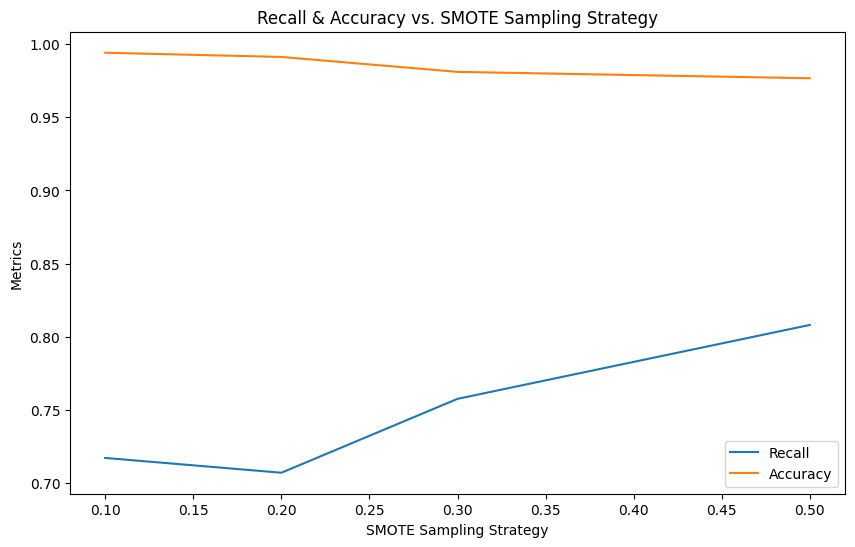

In [23]:
sampling_strategies = [0.1, 0.2, 0.3, 0.5]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=4)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_valid_noisy = add_noise(X_valid)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_valid_noisy, X_valid),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_valid_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_valid_denoised, y_valid),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_test_noisy = add_noise(X_test)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_test_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

In [25]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML_Miniproject3/creditcard.csv")

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

X = data.drop(['Class'], axis=1)
y = data['Class']

y_categorical = to_categorical(y, num_classes=2)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, train_size=0.6, random_state=4, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=np.argmax(y_temp, axis=1))

def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy = add_noise(X_test)
# Define the classifier model
input_dim = X_train.shape[1]

classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_valid_noisy, y_valid),
               verbose=1)

# Evaluate the classifier on the test set
y_pred_prob = classifier.predict(X_test_noisy)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate performance metrics
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Print classification report
print(f'Classification Report (Unbalanced Data with Noise Added):\n')
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

# Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", cm)

# Print accuracy and recall
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')

Epoch 1/20
668/668 [==============================] - 3s 3ms/step - loss: 0.0356 - accuracy: 0.9983 - val_loss: 0.0058 - val_accuracy: 0.9983
Epoch 2/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 3/20
668/668 [==============================] - 3s 5ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 4/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 5/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 

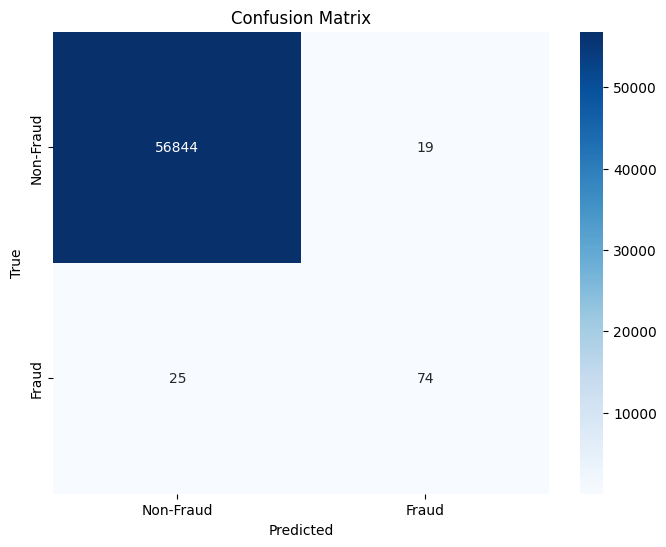

In [26]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

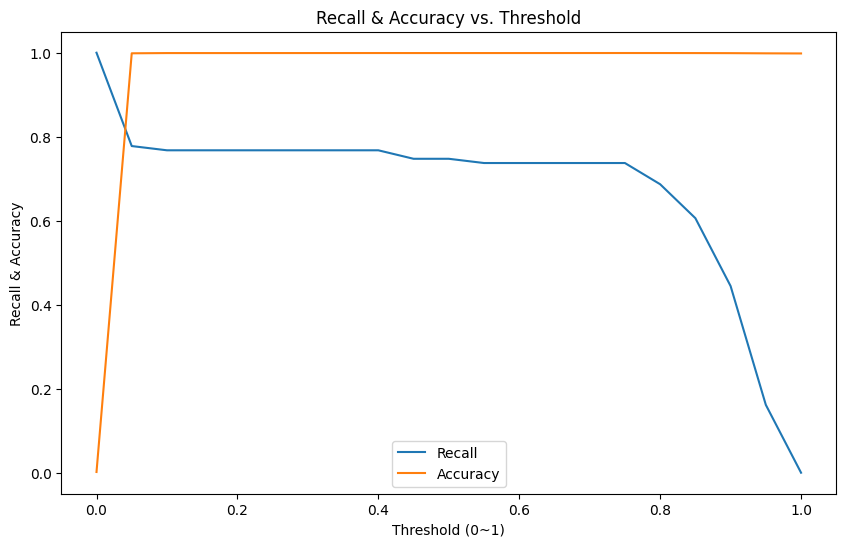

In [27]:
thresholds = np.arange(0.0, 1.05, 0.05)

recalls = []
accuracies = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

|   Threshold | Recall Rate   | Accuracy   |
|------------:|:--------------|:-----------|
|         0.2 | 76.77%        | 99.92%     |
|         0.3 | 76.77%        | 99.92%     |
|         0.4 | 76.77%        | 99.93%     |
|         0.5 | 74.75%        | 99.92%     |
|         0.6 | 73.74%        | 99.92%     |
|         0.7 | 73.74%        | 99.93%     |
|         0.8 | 68.69%        | 99.93%     |


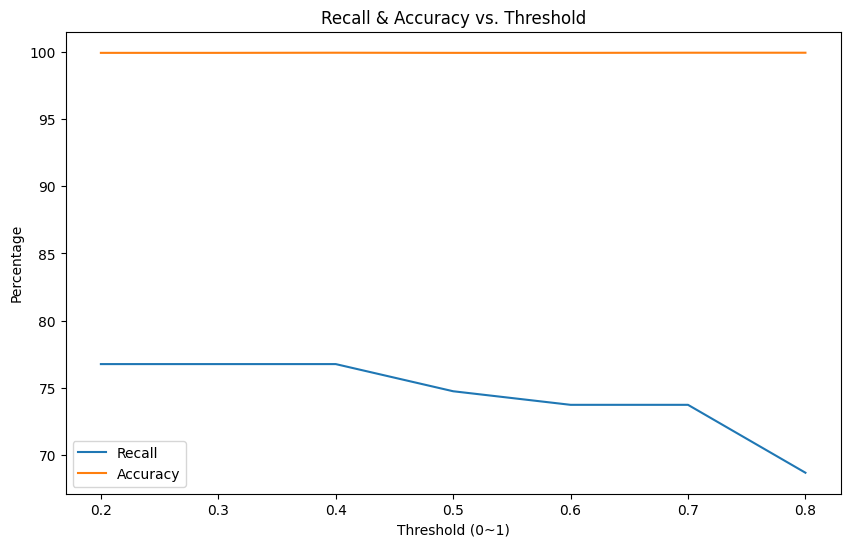

In [28]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

results = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'Threshold': threshold, 'Recall Rate': f'{recall:.2%}', 'Accuracy': f'{accuracy:.2%}'})

results_df = pd.DataFrame(results)

print(results_df.to_markdown(index=False))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, [float(r['Recall Rate'].strip('%')) for r in results], label='Recall')
plt.plot(thresholds, [float(r['Accuracy'].strip('%')) for r in results], label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Percentage')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

# Part 5

Resampled dataset shape with strategy 0.1: (187647, 29) (187647, 2)
Epoch 1/20
733/733 [==============================] - 4s 4ms/step - loss: 3.2044 - val_loss: 1.0718
Epoch 2/20
733/733 [==============================] - 2s 3ms/step - loss: 3.1269 - val_loss: 1.0513
Epoch 3/20
733/733 [==============================] - 2s 3ms/step - loss: 3.1112 - val_loss: 1.0397
Epoch 4/20
733/733 [==============================] - 4s 5ms/step - loss: 3.1039 - val_loss: 1.0265
Epoch 5/20
733/733 [==============================] - 3s 4ms/step - loss: 3.0941 - val_loss: 1.0248
Epoch 6/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0932 - val_loss: 1.0240
Epoch 7/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0925 - val_loss: 1.0235
Epoch 8/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0919 - val_loss: 1.0229
Epoch 9/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0838 - val_loss: 1.0080
Epoch 10/20
733/733 [===========

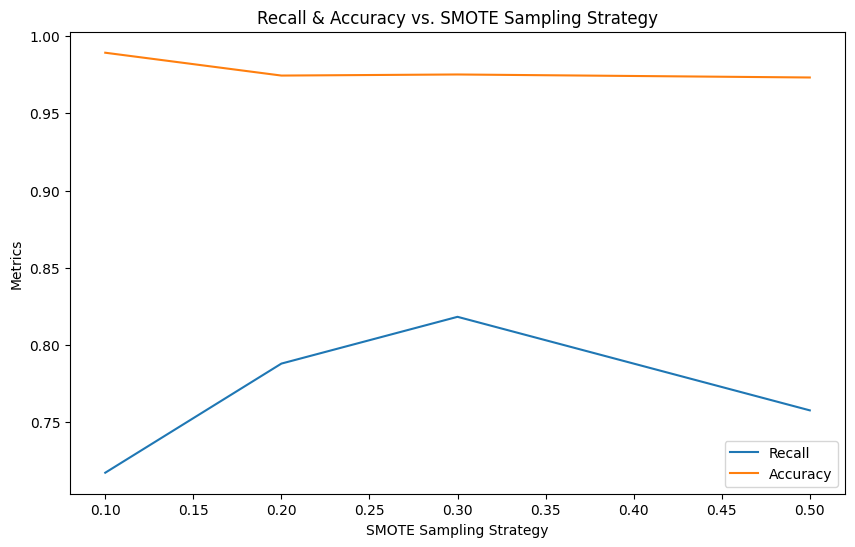

In [29]:
sampling_strategies = [0.1, 0.2, 0.3, 0.5]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=4)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_valid_noisy = add_noise(X_valid)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_valid_noisy, X_valid),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_valid_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_valid_denoised, y_valid),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_test_noisy = add_noise(X_test)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_test_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

In [31]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML_Miniproject3/creditcard.csv")

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

X = data.drop(['Class'], axis=1)
y = data['Class']

y_categorical = to_categorical(y, num_classes=2)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, train_size=0.6, random_state=4, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=np.argmax(y_temp, axis=1))

def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy = add_noise(X_test)
# Define the classifier model
input_dim = X_train.shape[1]

classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_valid_noisy, y_valid),
               verbose=1)

# Evaluate the classifier on the test set
y_pred_prob = classifier.predict(X_test_noisy)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate performance metrics
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Print classification report
print(f'Classification Report (Unbalanced Data with Noise Added):\n')
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

# Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", cm)

# Print accuracy and recall
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')

Epoch 1/20
668/668 [==============================] - 3s 3ms/step - loss: 0.0213 - accuracy: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9983
Epoch 2/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 3/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 4/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 6/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 7/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 

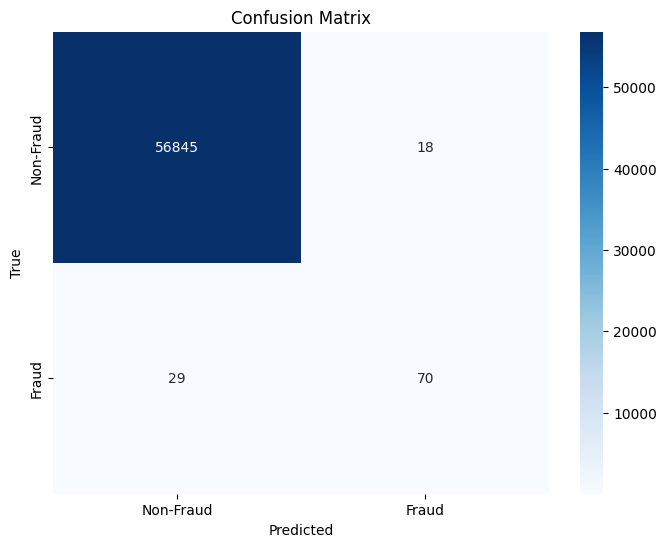

In [32]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()